# Iris -Decision Tree 

Objective: Develop a decision tree model that can predict the species of iris flowers based on their sepal and petal measurements.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.isna().sum() #no missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
duplicate_values = df[df.duplicated(keep=False)]

print("Duplicate Values:")
print(duplicate_values)

Duplicate Values:
     sepal_length  sepal_width  petal_length  petal_width    species
101           5.8          2.7           5.1          1.9  virginica
142           5.8          2.7           5.1          1.9  virginica


In [10]:
df= df.drop_duplicates()

print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[149 rows x 5 columns]


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df


C:\Users\reshm\AppData\Local\Temp\ipykernel_19580\3517968131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = label_encoder.fit_transform(df['species'])


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
# select features
y= df['species']
X = df.iloc[:,0:4]

In [13]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)


In [15]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
46,5.1,3.8,1.6,0.2
138,6.0,3.0,4.8,1.8
44,5.1,3.8,1.9,0.4
42,4.4,3.2,1.3,0.2
101,5.8,2.7,5.1,1.9
...,...,...,...,...
59,5.2,2.7,3.9,1.4
60,5.0,2.0,3.5,1.0
24,4.8,3.4,1.9,0.2
114,5.8,2.8,5.1,2.4


In [16]:
# train the decision tree
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=3,max_features='sqrt')

In [17]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt')

In [18]:
!pip install --upgrade sklearn

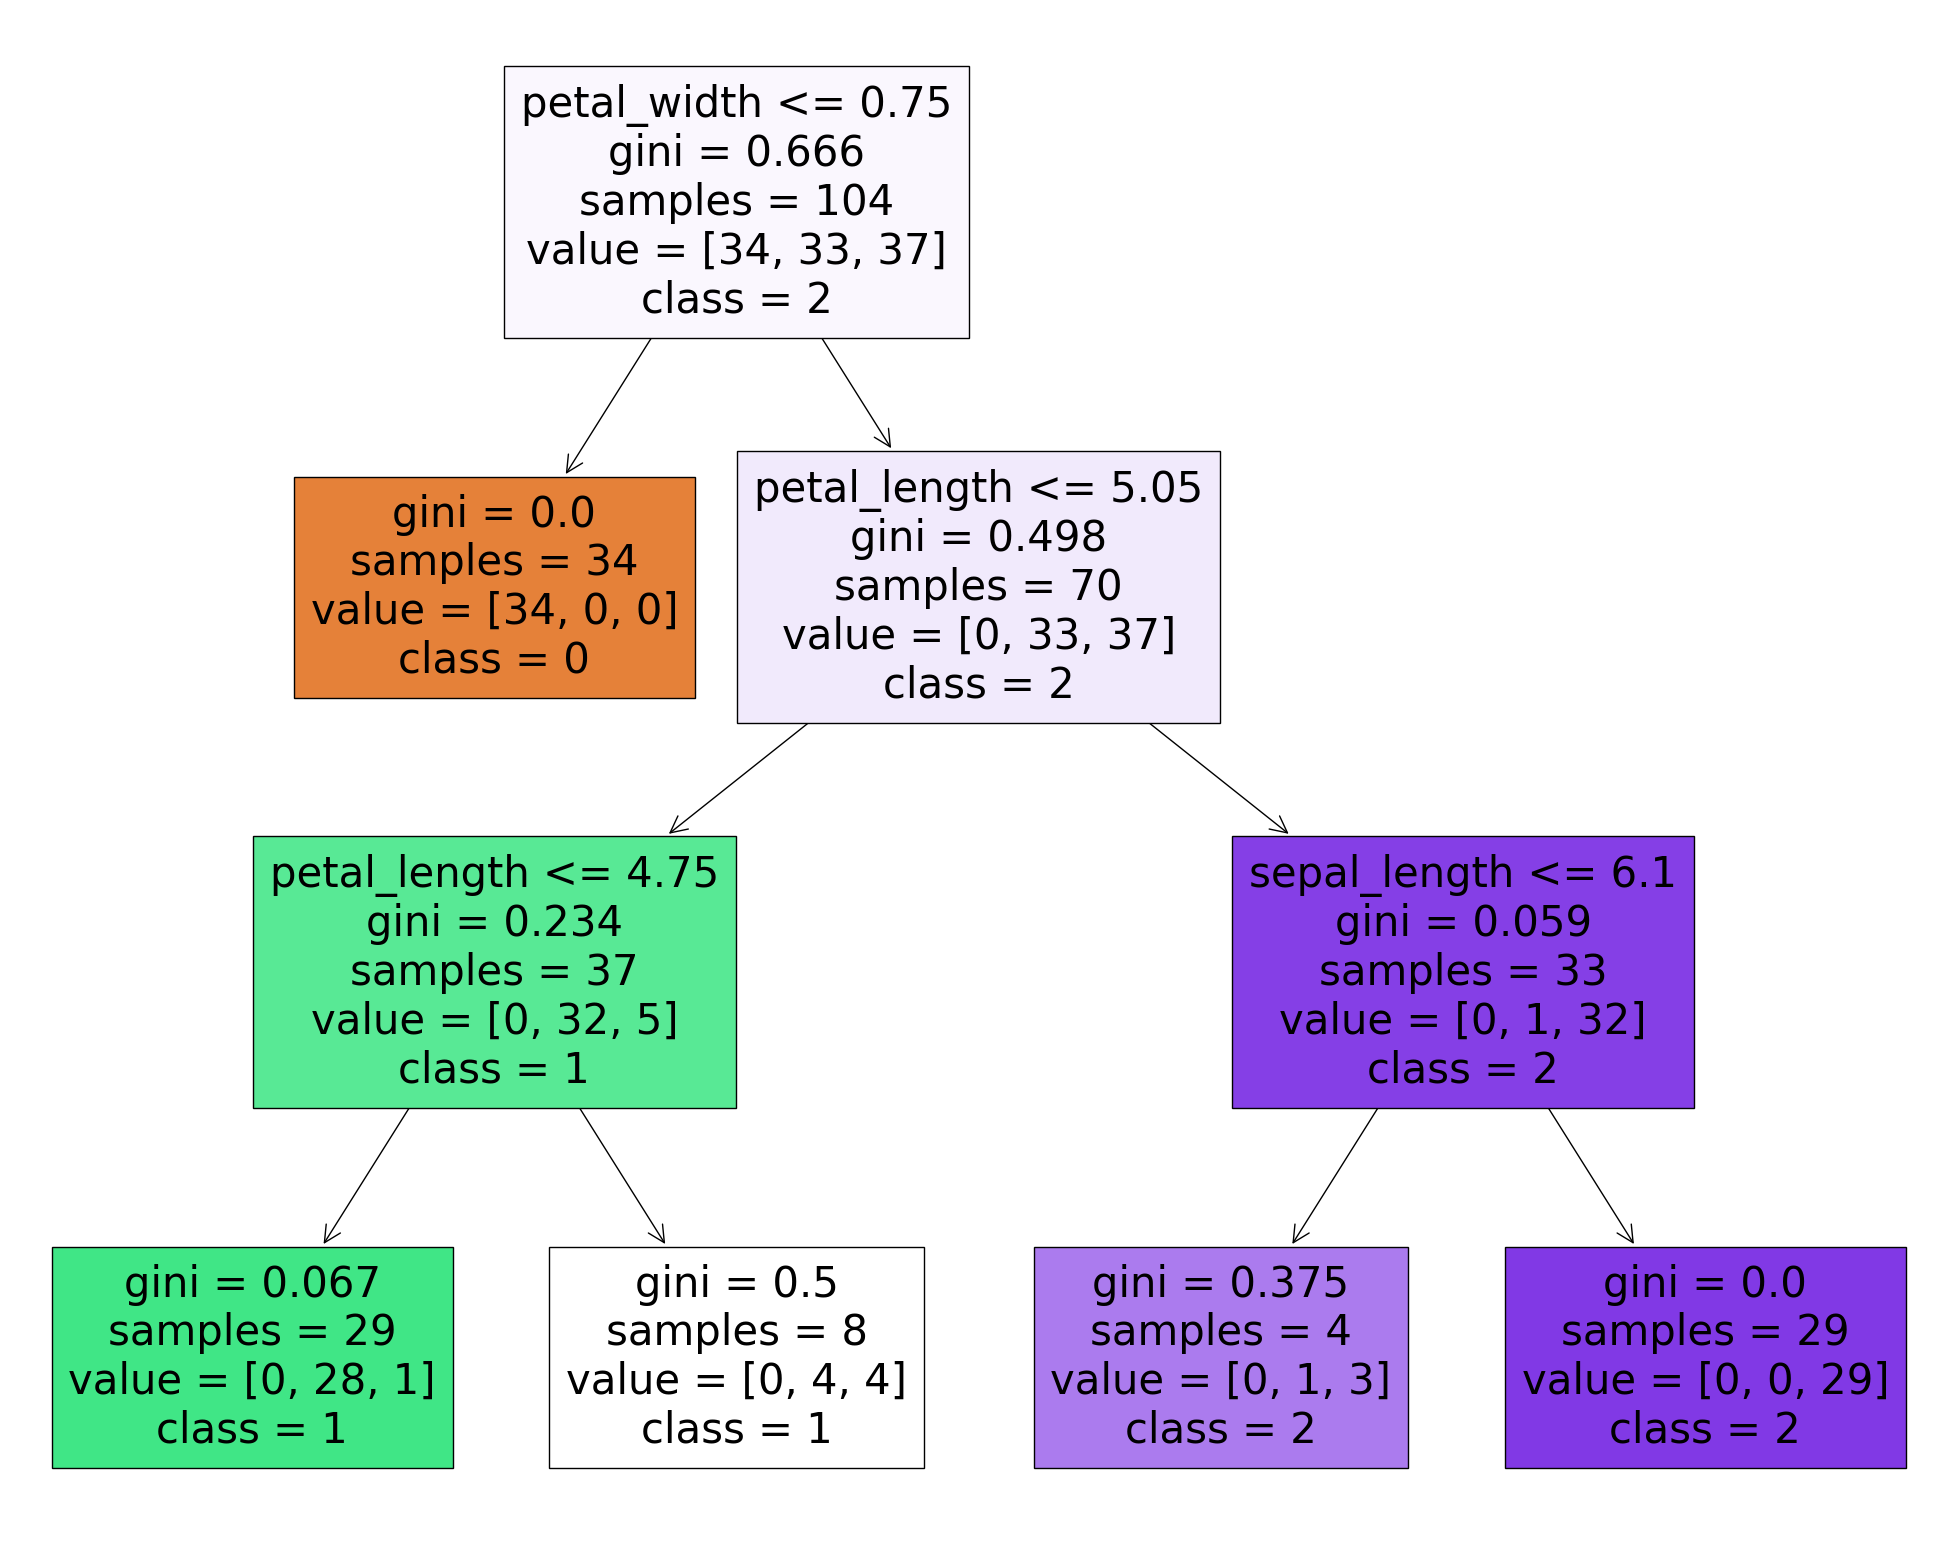

In [19]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=['0','1','2'],
                   filled=True)

In [20]:
y_train_pred_class = dtree.predict(X_train)

In [21]:
pd.crosstab(y_train,y_train_pred_class)

col_0,0,1,2
species,,,
0,34,0,0
1,0,32,1
2,0,5,32


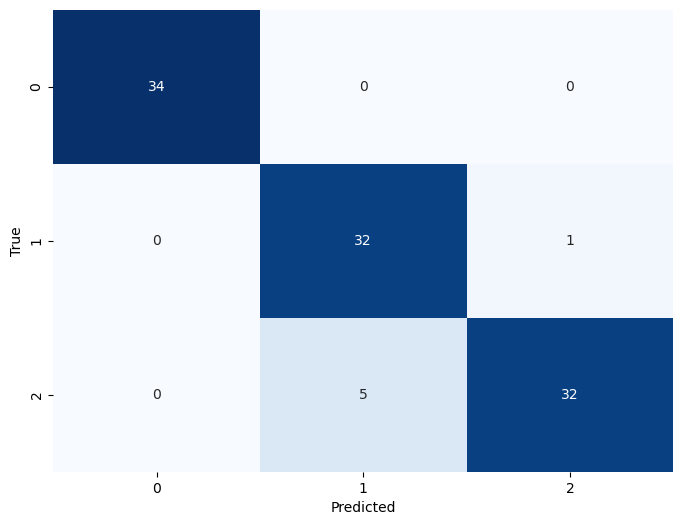

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [23]:
dtree.score(X_train,y_train)

0.9423076923076923

In [24]:
dtree.score(X_test,y_test)

0.9111111111111111

In [25]:
y_test_pred_class = dtree.predict(X_test)

In [26]:
pd.crosstab(y_test,y_test_pred_class)

col_0,0,1,2
species,,,
0,16,0,0
1,0,17,0
2,0,4,8


## Random Forest

In [35]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier
#creating a random forest instance
clf = RandomForestClassifier(criterion='gini',random_state=96,n_estimators = 150, max_depth=4)
#train the model
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=150, random_state=96)

In [36]:
#score on training data
clf.score(X_train, y_train)

0.9903846153846154

In [37]:
#score on test data
clf.score(X_test, y_test)

0.9555555555555556

In [38]:
y_train_pred_class = clf.predict(X_train)

In [39]:
y_test_pred_class = clf.predict(X_test)

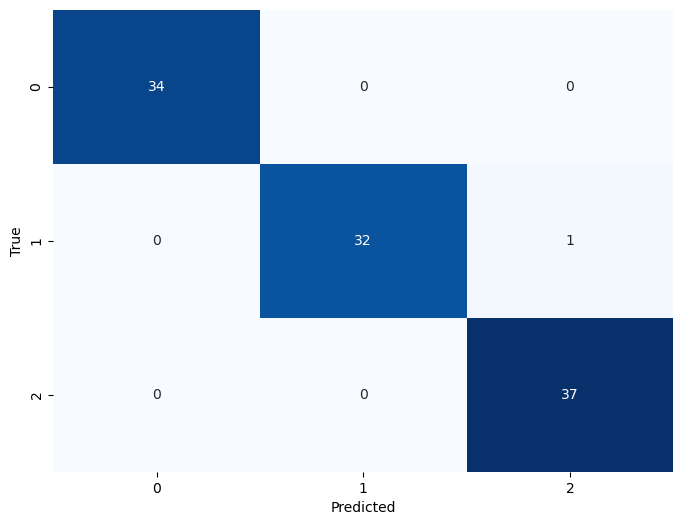

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [41]:
y_test_pred_class = clf.predict(X_test)

In [42]:
pd.crosstab(y_test,y_test_pred_class)

col_0,0,1,2
species,,,
0,16,0,0
1,0,17,0
2,0,2,10


In [43]:
#looking at the feature importance
clf.feature_importances_

array([0.09584262, 0.01266179, 0.41712361, 0.47437197])

In [45]:
#feature importance against each variable
pd.Series(clf.feature_importances_, index=X_train.columns)

sepal_length    0.095843
sepal_width     0.012662
petal_length    0.417124
petal_width     0.474372
dtype: float64